In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex4data1')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [2]:
weights=loadmat(r'C:\Users\saminens\Desktop\ML\ex3weights.mat')
weights.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [3]:
X=data['X']
y=data['y'].ravel()
m,n=X.shape
t1,t2=weights['Theta1'],weights['Theta2']
x=np.hstack((np.ones((m,1)),X))

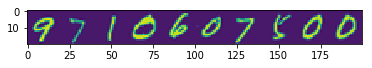

In [4]:
sd=np.random.choice(x.shape[0],10)
pt.imshow(x[sd,1:].reshape(-1,20).T)

In [5]:
def sigmoid(z):
    g=1 / (1+np.exp(-z))
    return g

In [6]:
def sigmoidgrad(z):
    f=z*(1-z)
    return f

In [7]:
nn_params= np.hstack((t1.flatten(),t2.flatten()))
num_labels=10
input_layer_size=400 
hidden_layer_size=25
def nncostfunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,lamda):
    Theta1=np.reshape(nn_params[0:(hidden_layer_size*((input_layer_size)+1)),],(hidden_layer_size, (input_layer_size + 1)))
    Theta2=np.reshape(nn_params[(hidden_layer_size*(input_layer_size+1)):,],(num_labels, (hidden_layer_size + 1)))
    m,n=X.shape
    X=np.hstack((np.ones((m,1)),X)) #5000x401
    a1=sigmoid(Theta1.dot(X.T)) # 25x5000
    a1=np.hstack((np.ones((m,1)),a1.T)) # 5000x26
    a2=sigmoid(Theta2.dot(a1.T)) # 10x5000
    k=np.zeros((num_labels,m)) # 10x5000
    for i in range(m):
        k[y[i]-1,i]=1 # check later
    
    J=(1/m)* np.trace(-k.dot(np.log(a2).T) - (1-k).dot(np.log(1-a2).T)) #10x10
    itheta1=Theta1[:,1:] #25x400
    itheta2=Theta2[:,1:] #10x25
    reg= (lamda/(2*m)) * (np.sum(np.sum(np.square(itheta1)))+ np.sum(np.sum(np.square(itheta2))))
    J=J+reg
    # backpropagation
    Theta1_grad=np.zeros((Theta1.shape))
    Theta2_grad=np.zeros((Theta2.shape))
    for s in range(m):
        k[y[s]-1,s]=1
    
     
    delta3=a2-k #10x5000
    delta2=((Theta2.T).dot(delta3))*sigmoidgrad(a1).T #26x5000
    delta2=delta2[1:,:]
    Theta2_grad=Theta2_grad+ (delta3.dot(a1))
    Theta1_grad=Theta1_grad+ (delta2.dot(X))
    
    Theta1_grad = Theta1_grad / m
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + lamda / m * Theta1[:, 1:]
    Theta2_grad = Theta2_grad / m
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + lamda / m * Theta2[:, 1:]
    
    grad= np.hstack((Theta1_grad.ravel(),Theta2_grad.ravel()))
    
    return J,grad
    
    
    


In [8]:
nncostfunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,1)


(0.38376985909092359,
 array([  6.18712766e-05,  -2.11248326e-12,   4.38829369e-13, ...,
          4.70513145e-05,  -5.01718610e-04,   5.07825789e-04]))

In [9]:
def randinitializeweights():
    eps=0.12
    t1=np.rand(hidden_layer_size,input_layer_size+1)*2*eps - eps
    t2=np.rand(num_labels,hidden_layer_size+1)*2*eps - eps
    theta=np.append(t1.flatten(),t2.flatten())
    return theta
    

In [10]:
#check backprop
def debugInitializeWeights(fan_out, fan_in):
    W = np.zeros((fan_out, 1 + fan_in))
    W = np.reshape(np.sin(range(W.size)), W.shape) / 10
    return W
    

In [11]:
def computeNumericalGradient(J, theta):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4
    for p in range(theta.size):
        perturb.reshape(perturb.size)[p] = e
        loss1,_ = J(theta - perturb)
        loss2,_ = J(theta + perturb)
        numgrad[p] = (loss2 - loss1) / (2*e);
        perturb[p] = 0
    return numgrad
    

In [12]:
def checkNNGradients(lamda):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    X  = debugInitializeWeights(m, input_layer_size - 1)
    y  = 1 + np.mod(range(m), num_labels).T
    nn_params=np.concatenate((Theta1.reshape(Theta1.size),Theta2.reshape(Theta2.size)))
    def cf(p):
        return nncostfunction(p,input_layer_size,hidden_layer_size,num_labels,X,y,lamda)
    _,grad=cf(nn_params)
    numgrad=computeNumericalGradient(cf, nn_params)
    diff = decimal.Decimal(np.linalg.norm(numgrad-grad))/decimal.Decimal(np.linalg.norm(numgrad+grad))
    return diff

In [13]:
checkNNGradients(0)    #diff is less than 1e-4....success!!

Decimal('2.108116162437662173942475093E-11')

In [14]:
checkNNGradients(3)

Decimal('1.915354600776808580860823158E-11')

In [15]:
debug_J  = nncostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
debug_J #for lambda = 3, this value should be about 0.576051

(0.5760512469501331,
 array([  6.18712766e-05,  -6.33744979e-12,   1.31648811e-12, ...,
         -5.20670005e-05,   1.03178624e-05,  -2.31823790e-05]))

In [16]:
#Training NN
import scipy.optimize as opt
result=opt.minimize(nncostfunction,nn_params,args=(input_layer_size, hidden_layer_size, num_labels, X, y, 1),options={'maxiter':20},method='L-BFGs-B',jac=True) #lambda=1


In [17]:
result

      fun: 0.32552985020655612
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.61739595e-04,  -1.49187391e-12,   3.09909242e-13, ...,
         8.29350388e-06,  -1.06045504e-04,  -7.33827986e-05])
  message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
     nfev: 26
      nit: 21
   status: 1
  success: False
        x: array([ -1.39895788e-02,  -7.45936956e-09,   1.54954621e-09, ...,
        -3.12955963e-01,   1.77960042e+00,  -1.78175106e+00])

In [18]:
nn_params=result["x"]
Theta1=np.reshape(nn_params[0:(hidden_layer_size*((input_layer_size)+1)),],(hidden_layer_size, (input_layer_size + 1)))
Theta2=np.reshape(nn_params[(hidden_layer_size*(input_layer_size+1)):,],(num_labels, (hidden_layer_size + 1)))

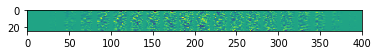

In [19]:
pt.imshow(Theta1[:,1:])  #really beautiful image -_-

In [20]:
#for prediction
def predict(Theta1, Theta2, X):
    m,n = X.shape
    num_labels = Theta2.shape[0]
    p = np.zeros((m, 1))
    h1=sigmoid(np.hstack((np.ones((m,1)),X)).dot(Theta1.T))
    h2=sigmoid(np.hstack((np.ones((m,1)),h1)).dot(Theta2.T))
    p=np.argmax(h2,axis=1)
    p=p+1
    return p

In [21]:
s=predict(Theta1,Theta2,X)
np.mean(s==y)*100

98.920000000000002

In [22]:
#thats a good prediction!